# Zoo_Animal_Classification

**Table Of Contents:**

    * Introduction
    * Abstract
    * Libraries
    * Get Data
    * Data Pre Processing
    * Exploratory data analysis
    * Make Prediction
    * Evaluate Prediction
    * Summary

# Introduction

This dataset consists of 101 animals from a zoo.
There are 16 variables with various traits to describe the animals. <br>
The 7 Class Types are: Mammal, Bird, Reptile, Fish, Amphibian, Bug and Invertebrate

The purpose for this dataset is to be able to predict the classification of the animals, based upon the variables.<br>
It is the perfect dataset for those who are new to learning Machine Learning. <br>
info : https://www.kaggle.com/uciml/zoo-animal-classification?select=class.csv

# Abstract

Average score by al estimators is ~80% <br>
Best Estimator is Knn 93.6% score <br>
only 1 observations from 11 missed. <br>
High score and High log loss can testify on overffiting therefore <br> my recommendtion to add more observations to make sure our model is more robust.

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn_pandas import DataFrameMapper
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_colwidth', -1) 
sns.set_style("whitegrid")

C:\Users\Home\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Get Data

**Zoo dataset**

In [3]:
zoo =  pd.read_csv(r'C:\\Users\Home\Documents\idan\Kaggle\multi_label_classification\zoo_animal_classification\dataset\zoo.csv')
print('\n\n** Zoo dataset **\n')
print(zoo.shape)
zoo.head()



** Zoo dataset **

(101, 18)


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


**class dataset**

In [4]:
class_data =  pd.read_csv(r'C:\\Users\Home\Documents\idan\Kaggle\multi_label_classification\zoo_animal_classification\dataset\class.csv')
print('\n\n** Class dataset **\n')
print(class_data.shape)
class_data



** Class dataset **

(7, 4)


,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf, cavy, cheetah, deer, dolphin, elephant, fruitbat, giraffe, girl, goat, gorilla, hamster, hare, leopard, lion, lynx, mink, mole, mongoose, opossum, oryx, platypus, polecat, pony, porpoise, puma, pussycat, raccoon, reindeer, seal, sealion, squirrel, vampire, vole, wallaby, wolf"
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, hawk, kiwi, lark, ostrich, parakeet, penguin, pheasant, rhea, skimmer, skua, sparrow, swan, vulture, wren"
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, herring, pike, piranha, seahorse, sole, stingray, tuna"
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth, termite, wasp"
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpion, seawasp, slug, starfish, worm"


**merge zoo and class into df**

step 1: class_data prepration - split data

In [5]:
class_data = pd.concat([class_data.Class_Type,class_data["Animal_Names"].str.split(",", expand = True)],axis=1)
class_data.head()

,Class_Type,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
0,Mammal,aardvark,antelope,bear,boar,buffalo,calf,cavy,cheetah,deer,dolphin,elephant,fruitbat,giraffe,girl,goat,gorilla,hamster,hare,leopard,lion,lynx,mink,mole,mongoose,opossum,oryx,platypus,polecat,pony,porpoise,puma,pussycat,raccoon,reindeer,seal,sealion,squirrel,vampire,vole,wallaby,wolf
1,Bird,chicken,crow,dove,duck,flamingo,gull,hawk,kiwi,lark,ostrich,parakeet,penguin,pheasant,rhea,skimmer,skua,sparrow,swan,vulture,wren,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,Reptile,pitviper,seasnake,slowworm,tortoise,tuatara,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,Fish,bass,carp,catfish,chub,dogfish,haddock,herring,pike,piranha,seahorse,sole,stingray,tuna,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,Amphibian,frog,frog,newt,toad,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


step 2: class_data prepration - set index and stacking

In [6]:
class_data = class_data.set_index('Class_Type').stack()
class_data.head()

Class_Type   
Mammal      0    aardvark 
            1     antelope
            2     bear    
            3     boar    
            4     buffalo 
dtype: object

step 3: class_data prepration - convert to dataframe

In [7]:
class_data = pd.DataFrame(class_data).reset_index().rename(columns= {0:'Animal_Names'}).drop(columns='level_1')
class_data.head()

,Class_Type,Animal_Names
0,Mammal,aardvark
1,Mammal,antelope
2,Mammal,bear
3,Mammal,boar
4,Mammal,buffalo


step 4: class_data prepration - check total animals name per class_type

In [8]:
class_data.groupby('Class_Type').count()

,Animal_Names
Class_Type,
Amphibian,4
Bird,20
Bug,8
Fish,13
Invertebrate,10
Mammal,41
Reptile,5


step 5 : remove white space

In [9]:
class_data.Animal_Names = class_data.Animal_Names.apply(lambda x : x.strip())
zoo.animal_name = zoo.animal_name.apply(lambda x : x.strip())

step 6 : convert to lower case

In [10]:
class_data = class_data.apply(lambda x: x.astype(str).str.lower())
zoo = zoo.apply(lambda x: x.astype(str).str.lower())

step 5: merge zoo and class_data

In [11]:
df = pd.merge(left=zoo,right=class_data,how='left',left_on='animal_name',right_on= 'Animal_Names')

In [12]:
df = df.drop(columns=['animal_name','Animal_Names','class_type'])

step 6: check how many animal_name not contain class_type

In [13]:
df.Class_Type.isnull().sum()

0

***Explain: There isn't missing values in class_data (target).***

**Split to Train Test**

Explain: We split to train and test for preventing  data leakage and using stratify to preserve label weights

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = 'Class_Type')
y = df.Class_Type
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.10, random_state=None)

train = pd.concat([X_train,y_train],axis=1)
test = pd.concat([X_test,y_test],axis=1)

df = train.copy()

In [15]:
print(f''' train {train.shape}, test {test.shape} ''')

 train (92, 17), test (11, 17) 


In [16]:
y_train.value_counts()

mammal          37
bird            18
fish            12
invertebrate    9 
bug             7 
amphibian       5 
reptile         4 
Name: Class_Type, dtype: int64

In [17]:
y_test.value_counts()

mammal          4
bird            2
fish            1
amphibian       1
reptile         1
invertebrate    1
bug             1
Name: Class_Type, dtype: int64

step 8: save new data as csv

In [18]:
train.to_csv(r'C:\\Users\Home\Documents\idan\Kaggle\multi_label_classification\zoo_animal_classification\dataset\train.csv',index=False)
test.to_csv(r'C:\\Users\Home\Documents\idan\Kaggle\multi_label_classification\zoo_animal_classification\dataset\test.csv',index=False)

# Data Pre Processing

* **Fit Attributes according Kaggle txt file attached**
* **Data Cleaning**
* **Impute Missing values**

In [19]:
train = pd.read_csv(r'C:\\Users\Home\Documents\idan\Kaggle\multi_label_classification\zoo_animal_classification\dataset\train.csv')  
test = pd.read_csv(r'C:\\Users\Home\Documents\idan\Kaggle\multi_label_classification\zoo_animal_classification\dataset\test.csv')  
df = train.copy()

* **Fit Attributes according Kaggle txt file attached**

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hair        92 non-null     int64 
 1   feathers    92 non-null     int64 
 2   eggs        92 non-null     int64 
 3   milk        92 non-null     int64 
 4   airborne    92 non-null     int64 
 5   aquatic     92 non-null     int64 
 6   predator    92 non-null     int64 
 7   toothed     92 non-null     int64 
 8   backbone    92 non-null     int64 
 9   breathes    92 non-null     int64 
 10  venomous    92 non-null     int64 
 11  fins        92 non-null     int64 
 12  legs        92 non-null     int64 
 13  tail        92 non-null     int64 
 14  domestic    92 non-null     int64 
 15  catsize     92 non-null     int64 
 16  Class_Type  92 non-null     object
dtypes: int64(16), object(1)
memory usage: 12.3+ KB


In [21]:
print('\n\n** All Data Types are Correct **\n\n')



** All Data Types are Correct **




* **Data Cleaning**

In [22]:
print('\n\n** No data to clean  **\n\n')



** No data to clean  **




* **Impute Missing values**

In [23]:
print('\n\n** No data to impute  **\n\n')



** No data to impute  **




 # Exploratory data analysis

Table of contents:

  * Split train into groups: categorical, numerical
  * Show Attributes Distribution
  * Correlation with target - not relevant 
  * Feature Engineering - not relevant
  * Scale & Encode
  * Evaluate Model by PCA & RandomForest - not relevant
  * Feature Importance - not relevant
  * Feature Selection
  * multicollinearity test - not relevant

### Split train into groups: categorical, numerical

In [24]:
# train
categorical = df.select_dtypes(include = 'object')
numerical = df.select_dtypes(include = 'number')

#test
categorical_test = test.select_dtypes(include = 'object')
numerical_test = test.select_dtypes(include = 'number')

### categorical Attributes Distribution 

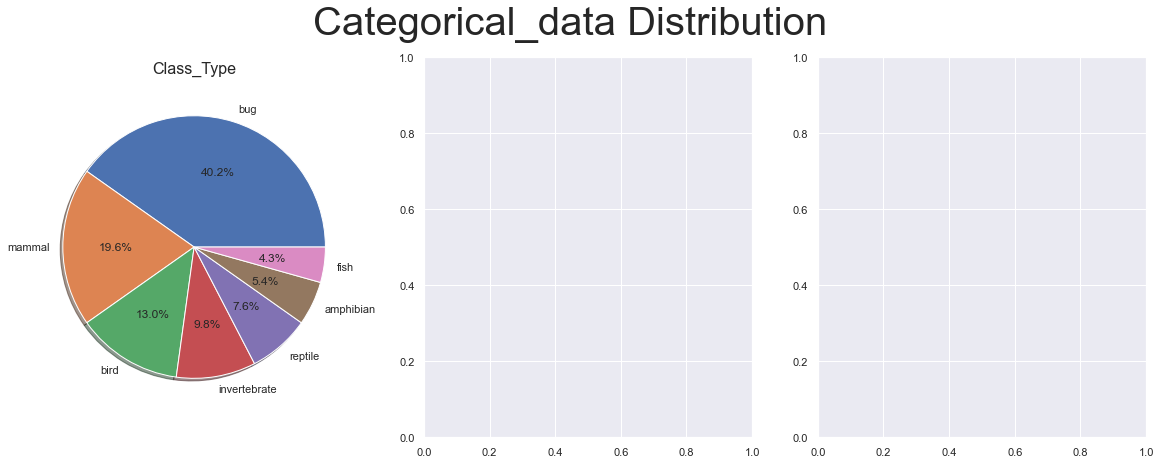

In [25]:
import random
import seaborn as sns
sns.set()
color_random = sns.color_palette()

#select categoricsl data
#categorical_data = df.select_dtypes(include = 'object').dropna()

rows = len(categorical.columns)//3 + np.where(len(categorical.columns)%3 > 0,1,0)
columns= 3

fig, axes = plt.subplots(rows, columns, figsize=(20, 7))
fig.suptitle('Categorical_data Distribution', size=40)

for i in range(1,rows*columns+1):           
    ax=plt.subplot(rows, 3, i)
    if len(categorical.columns) >= i :
       ax.pie(x=categorical[categorical.columns[i-1]].value_counts(),labels= categorical[categorical.columns[i-1]].unique(),colors=color_random,autopct='%1.1f%%', shadow=True)
       plt.title(f'{categorical.columns[i-1]}',size=16,pad=10)
    else:
          break

***Explain: <br>
     class_type (target): High variance***

### Numerical Attributes Distribution

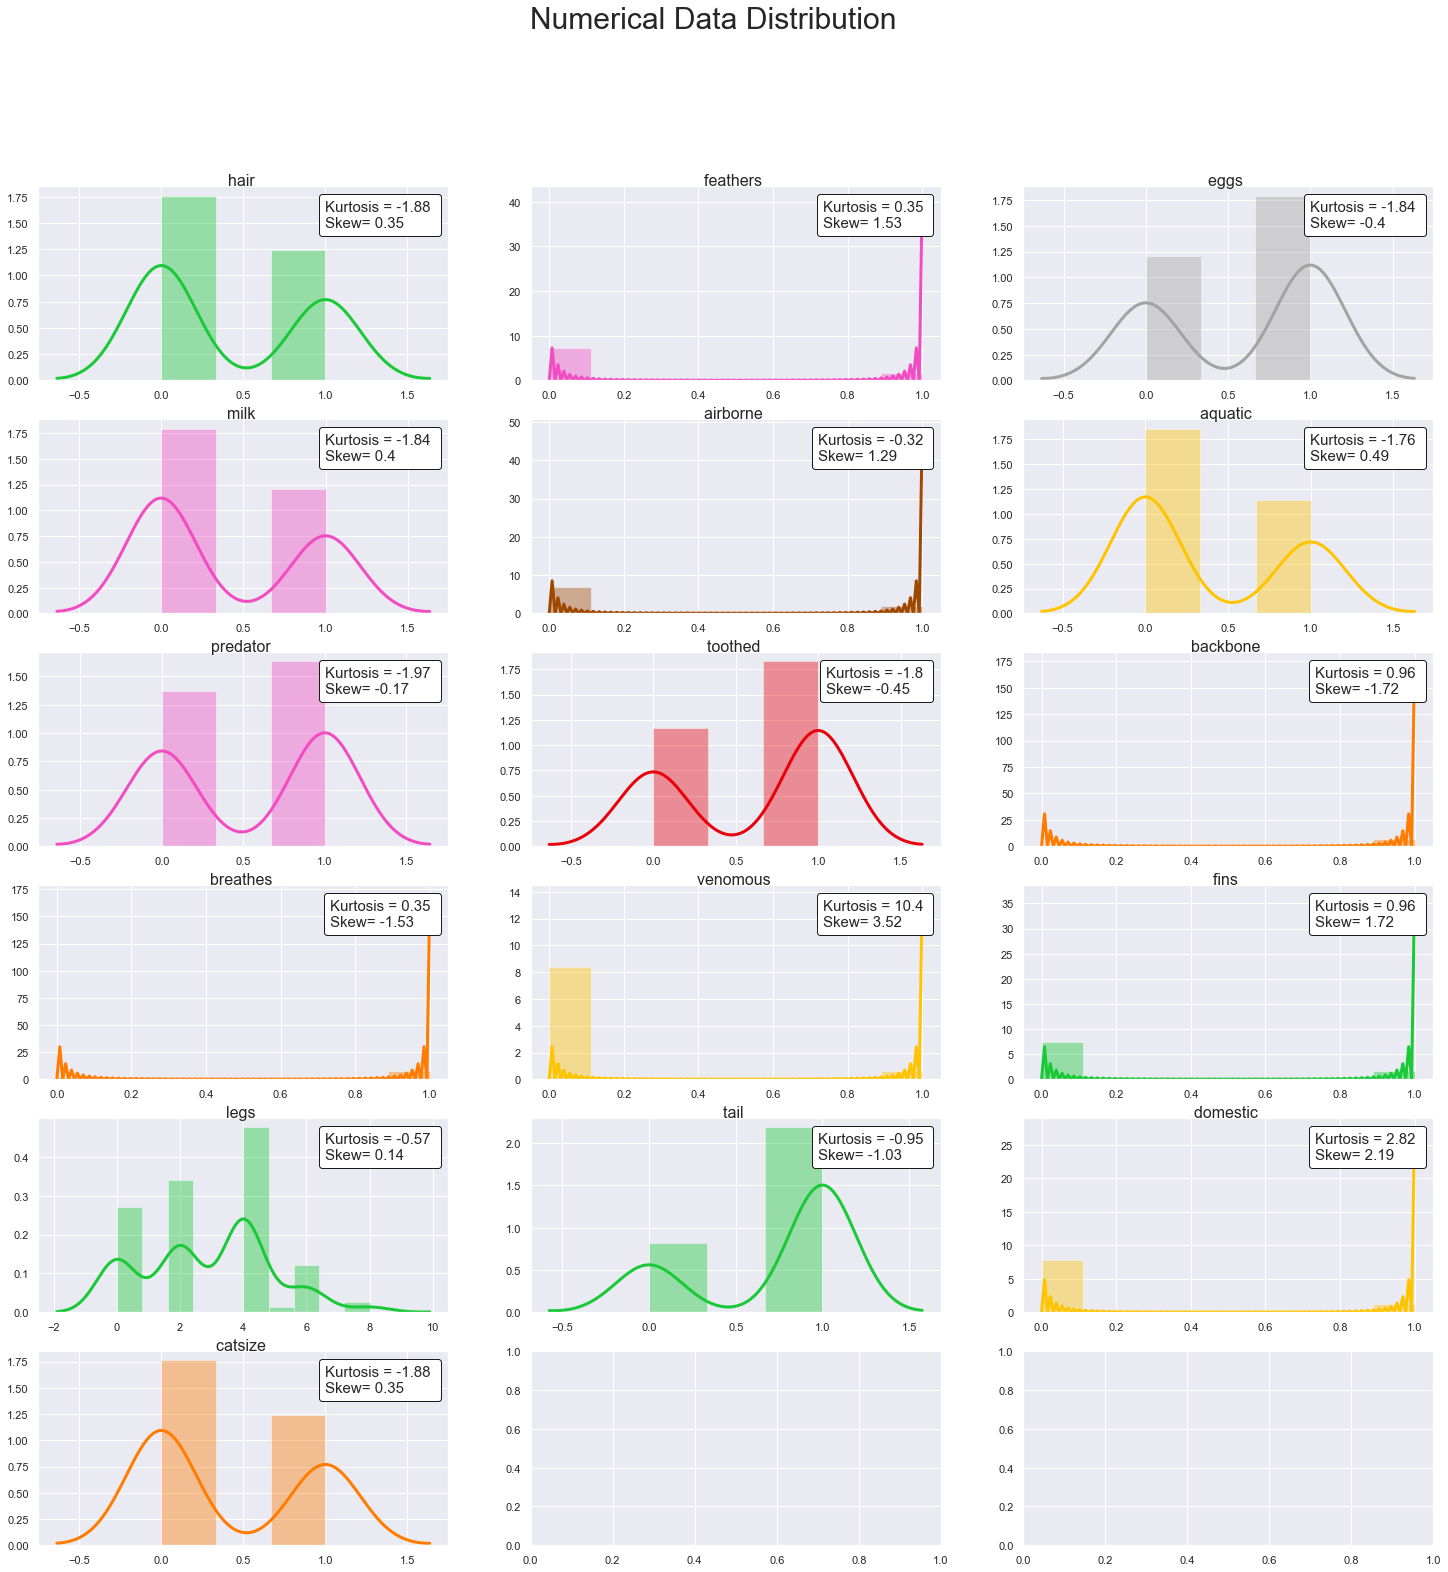

In [26]:
import random
import seaborn as sns
import numpy as np
from matplotlib.offsetbox import AnchoredText
from scipy.stats import kurtosis, skew
sns.set()
color_random = sns.color_palette("bright",10)

#select numerical data
#numerical_data = df.select_dtypes(include = 'number')


rows = len(numerical.columns)//3 + np.where(len(numerical.columns)%3 > 0, 1,0)
columns= 3

fig, axes = plt.subplots(rows, columns, figsize=(25, 25))
fig.suptitle('Numerical Data Distribution', size=30)

for i in range(1,rows*columns+1):
    ax=plt.subplot(rows, 3, i)
    if len(numerical.columns) >= i :
        plt.title(f'{numerical.columns[i-1]} ',size=16,pad=1)
        sns.distplot(
                     numerical[numerical.columns[i-1]], 
                     hist = True, kde = True,axlabel = False,
                     kde_kws = {'linewidth': 3},
                     label = numerical.columns,
                     color = random.choice(color_random)
                     )
        _kurtosis_ = round(kurtosis(numerical[numerical.columns[i-1]]),2)
        _skew_ = round(skew(numerical[numerical.columns[i-1]]),2)
        at = AnchoredText(
                           f"Kurtosis = {_kurtosis_} \nSkew= {_skew_}",
                           prop=dict(size=15), frameon=True,loc='upper right',
                          )
        at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
        ax.add_artist(at)
    else:
        break

***Explain: <br>
     'legs' : Discrete data <br>
     all others Atrributes: Binary***

### Scale & Encode

In [27]:
train = pd.read_csv(r'C:\\Users\Home\Documents\idan\Kaggle\multi_label_classification\zoo_animal_classification\dataset\train.csv')  
test = pd.read_csv(r'C:\\Users\Home\Documents\idan\Kaggle\multi_label_classification\zoo_animal_classification\dataset\test.csv')  
df = train.copy()

we will use Pipeline for encoding and evaluate estimators. <br>
Pipeline ([('OneHotEncoder', OneHotEncoder(drop = None,handle_unknown='ignore')), ('classifier', clf)])

# Make Prediction

**Split to train, test**

In [31]:
from sklearn.preprocessing import LabelEncoder
labeling = LabelEncoder()
#train
df = df.dropna()
X_train = df.drop(columns='Class_Type')
y_train = labeling.fit_transform(df.Class_Type)

#test
X_test = test.drop(columns='Class_Type')
y_test = labeling.transform(test.Class_Type)

**Estimators**

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, f1_score ,log_loss
from sklearn.metrics import f1_score
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier

Knn = KNeighborsClassifier(n_neighbors=3,weights='uniform')
RandomForest = RandomForestClassifier(min_samples_leaf=10)
XGBoost = XGBClassifier(max_depth =3)
LightGBM = LGBMClassifier(max_depth=3)
AdaBoost = AdaBoostClassifier()
CatBoost = CatBoostClassifier(silent=True)

classifiers = [Knn,RandomForest, XGBoost,LightGBM,AdaBoost,CatBoost]
classifiers_name = ['Knn','RandomForest', 'XGBoost','LightGBM','AdaBoost','CatBoost']

**Evaluation Metric**

In [34]:
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_validate

'''
more info : 
             https://scikit-learn.org/stable/modules/classes.html
             https://scikit-learn.org/stable/modules/model_evaluation.html
'''

skf = StratifiedKFold(n_splits=10) # preserve labels in train and test dataset
evaluate = pd.DataFrame({'Classifier':[],'Train':[],'Test':[],'F1_train':[],'F1_test':[],'roc_auc_train':[],'roc_auc_test':[],'Log_Loss_train':[],'Log_Loss_test':[],'Log_Loss_test_Accuracy':[]})

for idx, clf in enumerate(classifiers):
    pipe = Pipeline([('OneHotEncoder', OneHotEncoder(drop = None,handle_unknown='ignore')), ('classifier', clf)])
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    f_score_train = cross_validate(pipe, X_train, y_train, cv= skf, scoring= 'f1_micro')['test_score'].mean()
    f_score_test =f1_score(y_test,y_pred,average= 'micro')
    
    Log_Loss_train = log_loss(y_train,pipe.predict_proba(X_train))
    Log_Loss_test =log_loss(y_test,pipe.predict_proba(X_test))
    Log_Loss_test_Accuracy = 1-log_loss(y_test,pipe.predict_proba(X_test))
    
    roc_auc_score_train = roc_auc_score(y_train,pipe.predict_proba(X_train),average = 'macro',multi_class='ovo')
    roc_auc_score_test = roc_auc_score(y_test,pipe.predict_proba(X_test),average = 'macro',multi_class='ovo')
    
    evaluate= evaluate.append({'Classifier':classifiers_name[idx]
                               ,'Train':len(X_train)
                               ,'Test':len(X_test)
                               ,'F1_train':f_score_train
                               ,'F1_test':f_score_test
                               ,'roc_auc_train':roc_auc_score_train
                               ,'roc_auc_test':roc_auc_score_test
                               ,'Log_Loss_train':Log_Loss_train
                               ,'Log_Loss_test':Log_Loss_test
                               ,'Log_Loss_test_Accuracy':Log_Loss_test_Accuracy
                               },ignore_index=True)

# Evaluate Prediction

**Show Results**

In [36]:
# total accuracy on test combine F1,ROC_AUC_SCORE, Log_Loss_Accuracy
evaluate['%Score_on_test'] = evaluate.iloc[:,[4,6,9]].mean(axis=1) 

evaluate = evaluate.append({'Classifier' :'Total'
                         ,'Train':len(X_train)
                         ,'Test':len(X_test)
                         ,'F1_train':evaluate.F1_train.mean()
                         ,'F1_test':evaluate.F1_test.mean()
                         ,'Log_Loss_train':evaluate.Log_Loss_train.mean()
                         ,'Log_Loss_test':evaluate.Log_Loss_test.mean()
                         ,'roc_auc_train':evaluate.roc_auc_train.mean()
                         ,'roc_auc_test':evaluate.roc_auc_test.mean()
                         ,'Log_Loss_test_Accuracy':Log_Loss_test_Accuracy.mean()},ignore_index=True)

#add column to summarize results oon test
evaluate = evaluate.sort_values(by='%Score_on_test',ascending=False)
evaluate.loc[evaluate.Classifier=='Total','%Score_on_test']=evaluate.loc[evaluate.Classifier=='Total',['F1_test','roc_auc_test','Log_Loss_test_Accuracy']].mean(axis=1) 
evaluate

,Classifier,Train,Test,F1_train,F1_test,roc_auc_train,roc_auc_test,Log_Loss_train,Log_Loss_test,Log_Loss_test_Accuracy,%Score_on_test
0,Knn,92.0,11.0,0.934444,0.909091,0.998035,1.000000,0.050326,0.099874,0.900126,0.936406
2,XGBoost,92.0,11.0,0.977778,0.909091,1.000000,1.000000,0.046317,0.217150,0.782850,0.897314
5,CatBoost,92.0,11.0,0.988889,0.909091,1.000000,1.000000,0.006536,0.402435,0.597565,0.835552
3,LightGBM,92.0,11.0,0.911111,0.909091,1.000000,0.928571,0.007291,0.629759,0.370241,0.735968
1,RandomForest,92.0,11.0,0.814444,0.818182,0.991024,0.952381,0.565709,0.742599,0.257401,0.675988
4,AdaBoost,92.0,11.0,0.726667,0.636364,0.761905,0.761905,0.649516,0.734711,0.265289,0.554519
6,Total,92.0,11.0,0.892222,0.848485,0.958494,0.940476,0.220949,0.471088,0.597565,0.795509


***Explain: <br>
   *Total score by all models 79.55% <br>
   *Best Model Knn 93.6%  <br>
   *High F1 , High log_loss can estimate on overfitting. <br>
    we should increase datset observations.*** <br>

**Confusion Matrix**

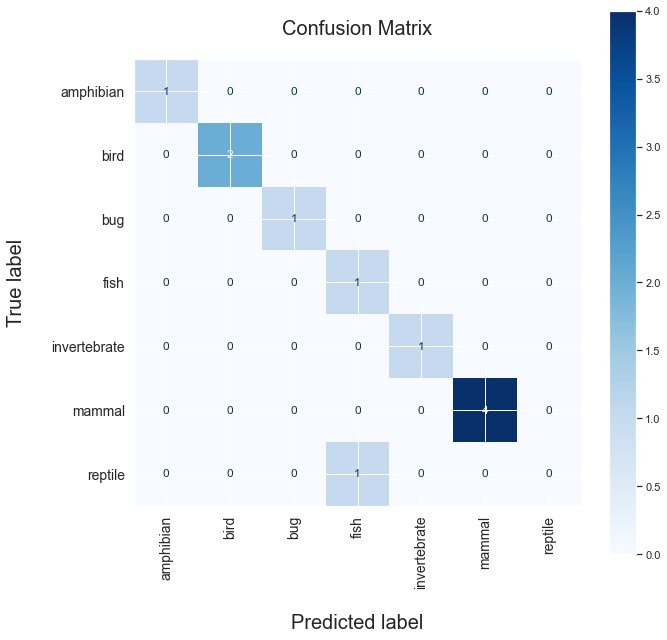

In [37]:
from sklearn.metrics import plot_confusion_matrix

clf = Knn
y_pred = pipe.predict(X_test)

fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Confusion Matrix', size =20,pad=25)
plt.xlabel('Predicted Label', size=20,labelpad=25)
plt.ylabel('True Label', size=20,labelpad=25)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=0)
plot_confusion_matrix(pipe, X_test, y_test,normalize=None,cmap='Blues',display_labels=labeling.classes_,xticks_rotation ='vertical', ax=ax)  

plt.show()  

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,target_names= labeling.classes_,digits=3))

              precision    recall  f1-score   support

   amphibian      1.000     1.000     1.000         1
        bird      1.000     1.000     1.000         2
         bug      1.000     1.000     1.000         1
        fish      0.500     1.000     0.667         1
invertebrate      1.000     1.000     1.000         1
      mammal      1.000     1.000     1.000         4
     reptile      0.000     0.000     0.000         1

    accuracy                          0.909        11
   macro avg      0.786     0.857     0.810        11
weighted avg      0.864     0.909     0.879        11



***Explain: <br>
   only 1 observation missed (from total 11 observations) <br>
   the results are good enough. <br>
   f1_weighted 88% <br>
   we can use this model.***

# Summary

Average score is ~80% <br>
Best Model is Knn 93.6% score <br>
only 1 observations from 11 missed. <br>
High score and High log loss can testify on overffiting therefore <br> my recommendtion to add more observations to make sure our model is robust